In [9]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid", rc={'figure.figsize':(15,10)})

Load Experiment data. 

In [4]:
all_tag_measurements = pd.read_pickle(r'tag_measurements_2020_03_28.pkl')
all_tag_measurements = all_tag_measurements.dropna(how='any').reset_index(drop=True)

Choose obstacle to show

In [5]:
pd.unique(all_tag_measurements.obstacle)

array(['No Obstacle', 'Obstacle: person'], dtype=object)

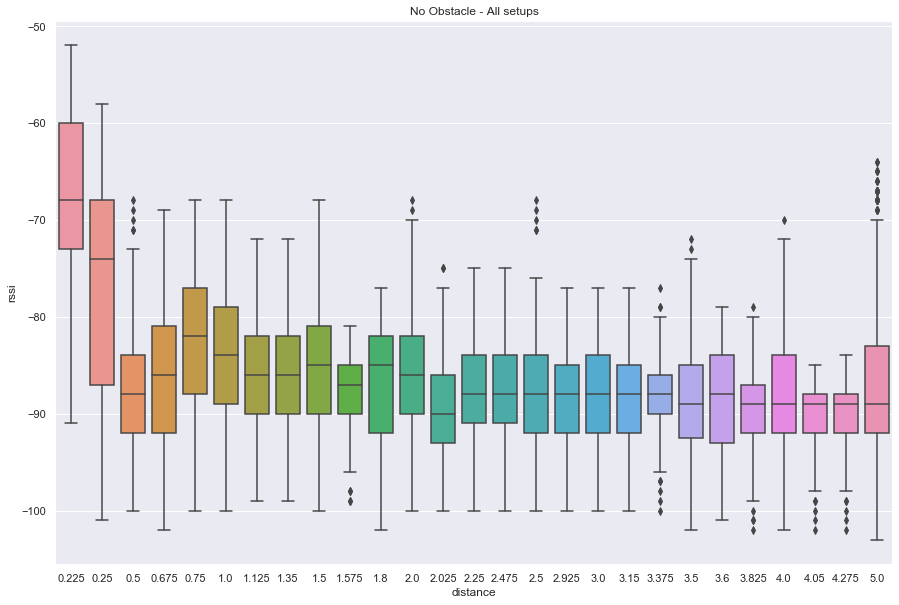

In [10]:
obstacle = 'No Obstacle'

show_measurements = all_tag_measurements.where(all_tag_measurements.obstacle == obstacle)
show_measurements = show_measurements.dropna(how='any').reset_index(drop=True)

ax = sns.boxplot(x=show_measurements["distance"], y=show_measurements["rssi"]).set_title(obstacle + " - All setups")

In [38]:
pd.unique(show_measurements.setup)

array(['Phone in front pocket', 'Phone in hand'], dtype=object)

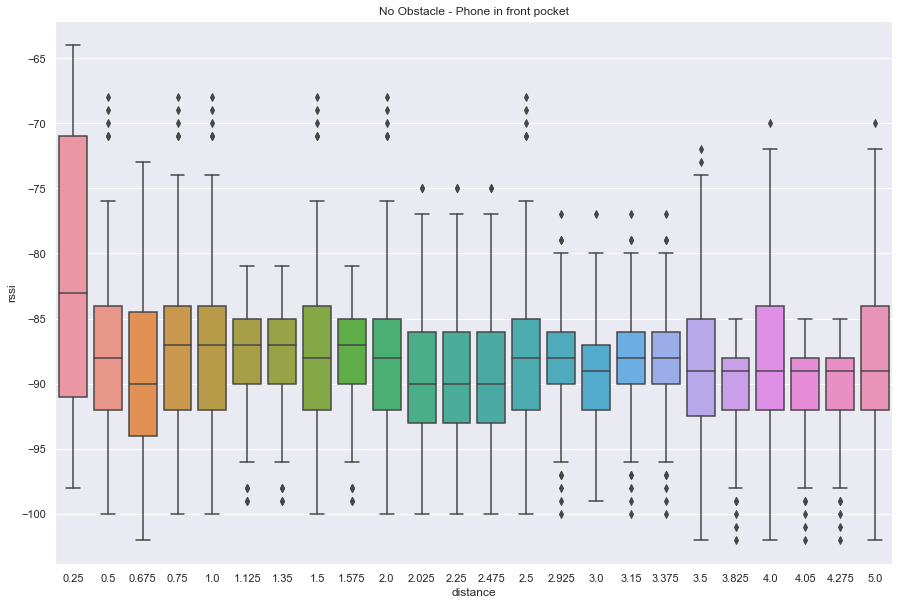

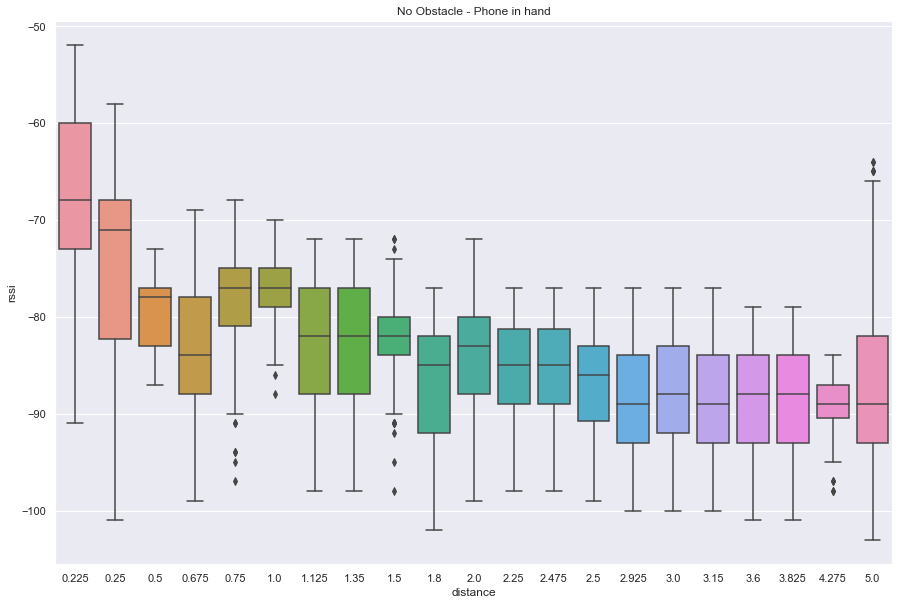

In [12]:
for setup in pd.unique(show_measurements.setup):
    setup_measurements = show_measurements.where(show_measurements.setup == setup)
    title_str = str(obstacle) + " - " + str(setup)
    plt.figure()
    sns.boxplot(x=setup_measurements["distance"], y=setup_measurements["rssi"]).set_title(title_str)
    plt.show()
